# 로지스틱 회귀 분석

- 회귀 분석 문제와 분류 문제 모두에 사용할 수 있다.

- 종속 변수가 이항 분포를 따르고 그 모수 $\theta$가 독립 변수 $x$에 의존한다고 가정한다.

$$ p(y \mid x) = \text{Bin} (y \mid \theta(x), N) $$

- 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀 분석만 고려하기로 한다.

$$ p(y \mid x) = \text{Bern} (y \mid  \theta(x) )$$



- $y$가 0또는 1인 분류 예측 문제를 풀 때

$$ \hat{y} = \begin{cases} 1 & \text{ if } \theta(x) \geq 0.5 \\ 0 & \text{ if } \theta(x) < 0.5 \end{cases} $$

## 시그모이드 함수(sigmoid function)

* 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값과 
* 항상 0 또는 양의 기울기를 가지는 함수

x에 대한 선형 함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드 함수라는 함수를 사용하여 변형한 것을 사용한다.


 
$$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$

 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} = 2 \sigma(2x) - 1$$


$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$

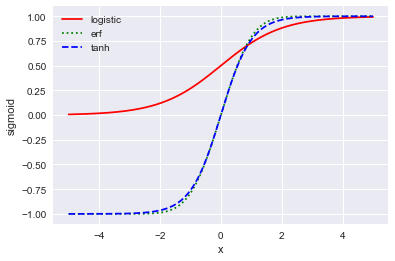

In [2]:
import scipy as sp
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

## 로지스틱 함수

- $-\infty$부터 $\infty$까지의 값을 가지는 변수가 0부터 1사이의 값을 가지는 결과이다.

$$ \text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}} $$  

## 선형 판별 함수

* $z = 0$일 때 $\theta = 0.5$
* $z > 0$일 때 $\theta > 0.5$
* $z < 0$일 때 $\theta < 0.5$

$z$가 분류 모형의 판별 함수(decision function)의 역할을 한다.

로지스틱 회귀 모형에서는 판별 함수 $z$를 $x$의 선형 함수로 가정한다. 즉

$$ z = w^Tx  $$

$$ \theta(x) = \dfrac{1}{1+\exp{(-w^Tx)}} $$  

가 된다.

## 로지스틱 모형의 모수 추정

MLE(Maximum Likelihood Estimation) 방법으로 모수 $w$를 추정할 수 있다. ($y$가 베르누이 확률 변수)

$$ p(y \mid x) = \text{Bern} (y \mid  \theta(x;w) )$$

$\theta$가 로지스틱 함수 형태로 표현된다면

$$
\theta(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

베르누이 확률분포의 정의에서

$$
\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \theta_i(x_i;w)^{y_i} (1-\theta_i(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i;w) +  (1-y_i)\log(1-\theta_i(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$

가 된다.


LL을 최대화하는  $w$ 값을 구하기 위해 다음과 같이 미분을 한다.

$$ \dfrac{\partial\text{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial\text{LL}}{\partial \theta_i(x_i;w)} \dfrac{\partial\theta_i(x_i;w)}{\partial w} $$

우선 $\theta$를 $w$로 미분하면

$$ 
\dfrac{\partial \theta_i(x_i;w)}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
= \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
= \theta_i(x_i;w)(1-\theta_i(x_i;w)) x_i 
$$

LL을 $\theta$로 미분하면

$$
\dfrac{\partial\text{LL}}{\partial \theta_i(x_i;w)} =  \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) 
$$

두 식을 곱하면

$$ 
\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \theta(x_i;w)(1-\theta(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}
$$

이 값은 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 최적 모수 $w$의 값을 구해야 한다.

## StatsModels 패키지의 로지스틱 회귀

In [12]:
import statsmodels.api as sm
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)
X[:10]

array([[ 1.        , -0.56511345],
       [ 1.        ,  1.81256131],
       [ 1.        , -1.33619806],
       [ 1.        ,  1.74890611],
       [ 1.        , -0.19702637],
       [ 1.        , -0.97174619],
       [ 1.        ,  0.09145142],
       [ 1.        , -0.81781175],
       [ 1.        ,  1.02115611],
       [ 1.        , -0.37608967]])

In [8]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Apr 2018   Pseudo R-squ.:                  0.7679
Time:                        19:37:53   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [13]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
sigmoid[:10]

array([3.86616110e-06, 4.99842983e-06, 6.46229989e-06, 8.35488411e-06,
       1.08017348e-05, 1.39651718e-05, 1.80550481e-05, 2.33426682e-05,
       3.01787795e-05, 3.90168297e-05])

In [15]:
logit_res.predict(X)[:10]

array([0.1049293 , 0.99964161, 0.0044444 , 0.99953068, 0.35811034,
       0.02049187, 0.65454145, 0.03861956, 0.98984289, 0.20710118])

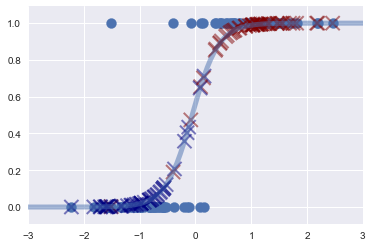

In [22]:
plt.plot(xx, sigmoid, lw=5, alpha=0.5)  # 시그모이드 그리기
plt.scatter(X0, y, marker='o', s=100)   # y값  (점들)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet) # 예측값 (X표시들)
plt.xlim(-3, 3)
plt.show()

## Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 `LogisticRegression` 를 제공한다. 

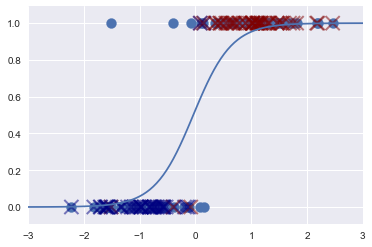

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)
xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()